In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/drive/MyDrive/DSC 680/bankfull.xlsx")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,37,admin.,married,university.degree,no,yes,no,cellular,jul,wed,353,1,999,0,nonexistent,no
1,45,technician,married,professional.course,no,yes,no,cellular,jul,wed,95,1,999,0,nonexistent,no
2,34,blue-collar,married,basic.9y,no,yes,no,cellular,jul,wed,477,1,999,0,nonexistent,no
3,38,blue-collar,married,unknown,no,yes,no,cellular,jul,wed,131,1,999,0,nonexistent,no
4,33,admin.,married,high.school,no,yes,no,cellular,jul,wed,134,1,999,0,nonexistent,no


# Data Exploration

In [3]:
# df['pdays'].value_counts()

In [4]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [5]:
# df['campaign'].value_counts()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


In [7]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [8]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [9]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [10]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [11]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
# df['campaign'].value_counts()

### Outcome of data exploration

Our exploration shows that come variables posses values that were unknown.  These variables include:
* Job type
* Marital status
* Education
* Default
* Housing loan
* poutcome

To avoid bias in our analysus, those records in which their values were unknown were filtered out.  This was done in power bi.  The remaining dataset is hereby imported to python.

In [13]:
data = pd.read_excel("/content/drive/MyDrive/DSC 680/bankclean.xlsx")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,professional.course,no,yes,yes,cellular,may,tue,121,1,999,1,failure,no
1,49,blue-collar,married,professional.course,no,yes,yes,cellular,may,tue,145,1,999,1,failure,no
2,31,blue-collar,married,basic.9y,no,no,yes,cellular,may,tue,183,1,999,1,failure,no
3,39,blue-collar,married,basic.6y,no,yes,yes,cellular,may,thu,195,1,999,1,failure,no
4,39,blue-collar,married,high.school,no,no,yes,cellular,may,fri,248,1,999,1,failure,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4652 non-null   int64 
 1   job          4652 non-null   object
 2   marital      4652 non-null   object
 3   education    4652 non-null   object
 4   default      4652 non-null   object
 5   housing      4652 non-null   object
 6   loan         4652 non-null   object
 7   contact      4652 non-null   object
 8   month        4652 non-null   object
 9   day_of_week  4652 non-null   object
 10  duration     4652 non-null   int64 
 11  campaign     4652 non-null   int64 
 12  pdays        4652 non-null   int64 
 13  previous     4652 non-null   int64 
 14  poutcome     4652 non-null   object
 15  y            4652 non-null   object
dtypes: int64(5), object(11)
memory usage: 581.6+ KB


After filtering, 4652 records were found to be useful.

In [15]:
data['y'].value_counts()

no     3365
yes    1287
Name: y, dtype: int64

In [16]:
data.rename(columns={"y":"Subscribed"},inplace=True)

The class distirbution is much in favor of 'no', we shall undersample the majority class to reduce the class difference.

### Put the Age,duration,campain,previous and pday variables into bins for exploratory analysis

In [17]:
data.describe()

,age,duration,campaign,pdays,previous
count,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000
mean,40.073732,266.084480,1.949914,719.366939,1.273216
std,12.399341,239.182406,1.418716,446.691034,0.646134
min,17.000000,1.000000,1.000000,0.000000,1.000000
25%,31.000000,116.000000,1.000000,12.000000,1.000000
50%,37.000000,199.000000,1.000000,999.000000,1.000000
75%,47.000000,329.000000,2.000000,999.000000,1.000000
max,94.000000,3509.000000,16.000000,999.000000,7.000000


In [18]:
# bin the age as agecat

agebin = [0,20,40,60,80,100]
labels =["below 20","20-40","40-60","60-80","Over 80"]
data['agecat'] = pd.cut(data['age'],agebin,labels=labels)

In [19]:
data['agecat'].value_counts()

20-40       2837
40-60       1476
60-80        274
below 20      34
Over 80       31
Name: agecat, dtype: int64

In [20]:
# convert duration into minutes and bin them

data['duration2'] = data['duration']/60

In [21]:
binsm = [0,5,10,15,20,25,30,60]
mins = ["<5mins","6-10mins","11-15mins","16-20mins","21-25mins","26-30mins","over 30mins"]
data["duration_lastcontact"] = pd.cut(data['duration2'],binsm,labels=mins)

In [22]:
data['duration_lastcontact'].value_counts()

<5mins         3287
6-10mins        999
11-15mins       240
16-20mins        76
21-25mins        32
26-30mins        12
over 30mins       6
Name: duration_lastcontact, dtype: int64

In [23]:
# bin the number of campaigns made to the client.  The number ranges between 1 and 16

nocam = [0,2,4,6,8,16]
labeln = ["<2times","2-4times","4-6times","6-8times",">8 times"]
data['campaign_times'] = pd.cut(data['campaign'],nocam,labels=labeln)

In [24]:
data['campaign_times'].value_counts(normalize=True)

<2times     0.787833
2-4times    0.150473
4-6times    0.044927
6-8times    0.012468
>8 times    0.004299
Name: campaign_times, dtype: float64

In [25]:
data['pdays'].value_counts()

999    3342
3       381
6       363
4       102
9        53
2        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
0        14
8        13
16        8
17        6
18        5
19        3
22        3
21        2
25        1
27        1
26        1
Name: pdays, dtype: int64

In [26]:
pbins = [0,7,14,21,28,999]
pblevels = ['Within 1wk','within 2wks','within 3wks','within 4wks','never_contacted']
data['pdays_contact'] = pd.cut(data['pdays'],pbins,labels=pblevels)

In [27]:
data['pdays_contact'].value_counts()

never_contacted    3342
Within 1wk         1013
within 2wks         231
within 3wks          46
within 4wks           6
Name: pdays_contact, dtype: int64

In [28]:
# number of previous contact

prbins = [0,2,4,6,7]
prlevels = ["<= 2 times","4 times","6times","7timers or more"]
data['prcontact'] = pd.cut(data['previous'],prbins,labels=prlevels)

In [29]:
data['prcontact'].value_counts()

<= 2 times         4385
4 times             246
6times               20
7timers or more       1
Name: prcontact, dtype: int64

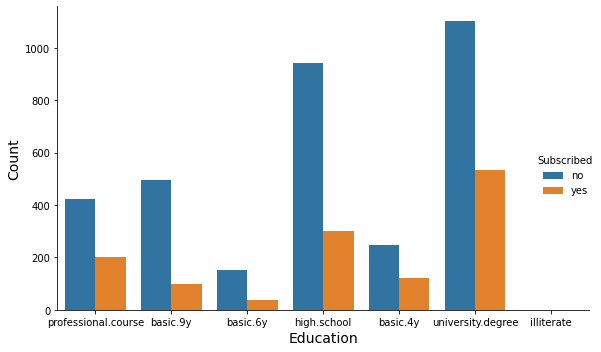

In [30]:
sns.catplot(x="education",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("Education",size=14)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

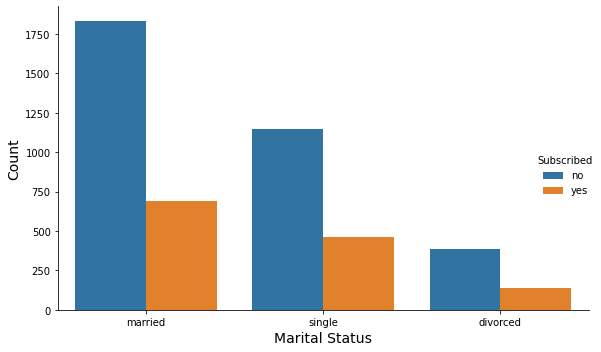

In [31]:
sns.catplot(x="marital",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("Marital Status",size=14)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

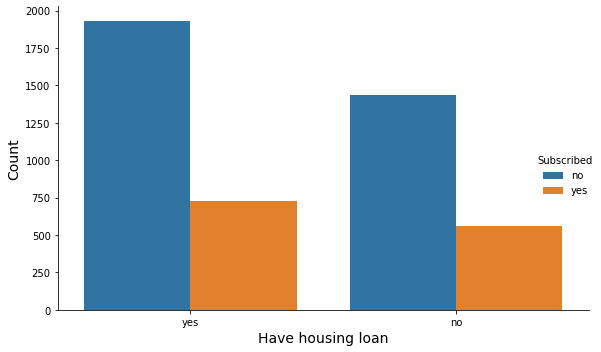

In [32]:
sns.catplot(x="housing",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("Have housing loan",size=14)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

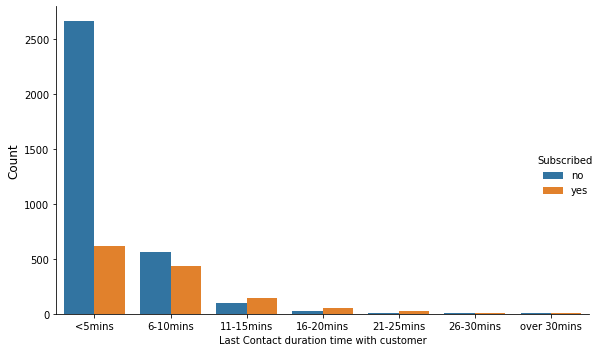

In [33]:
sns.catplot(x="duration_lastcontact",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("Last Contact duration time with customer",size=10)
plt.ylabel("Count",size=12)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

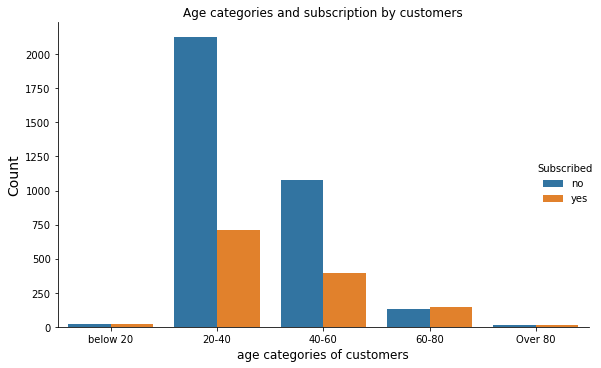

In [34]:
sns.catplot(x="agecat",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("age categories of customers",size=12)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Age categories and subscription by customers");

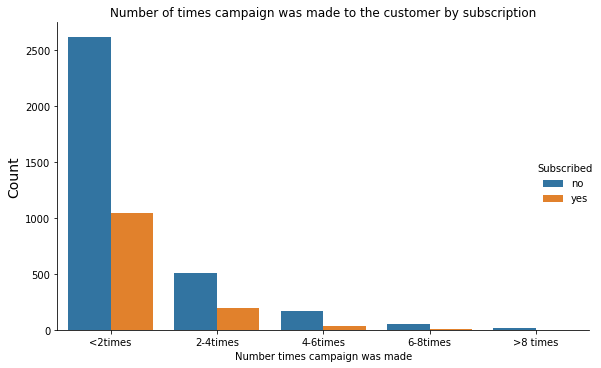

In [35]:
sns.catplot(x="campaign_times",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("Number times campaign was made",size=10)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Number of times campaign was made to the customer by subscription");

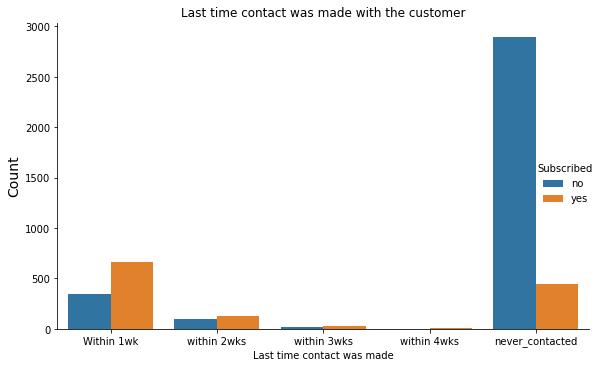

In [36]:
sns.catplot(x="pdays_contact",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.xlabel("Last time contact was made",size=10)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Last time contact was made with the customer");

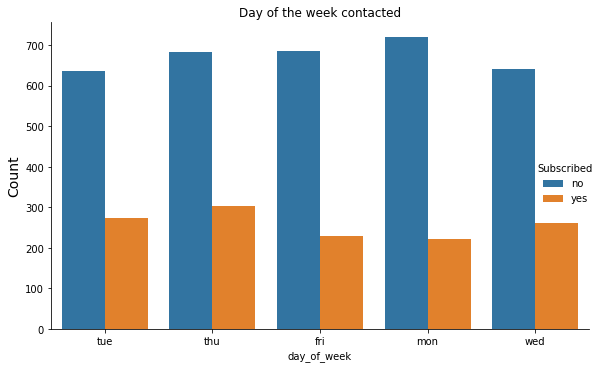

In [37]:
sns.catplot(x="day_of_week",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Day of the week contacted");

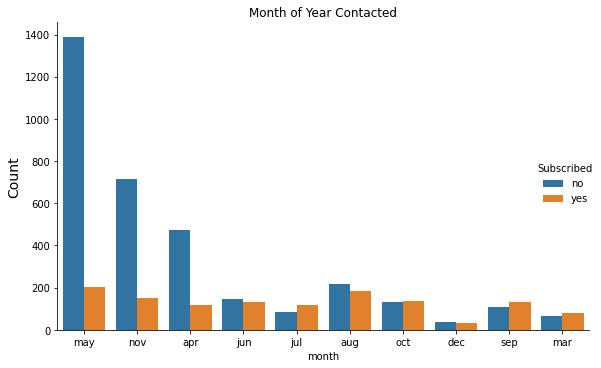

In [38]:
sns.catplot(x="month",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.ylabel("Count",size=14)
plt.tight_layout()
plt.title("Month of Year Contacted");

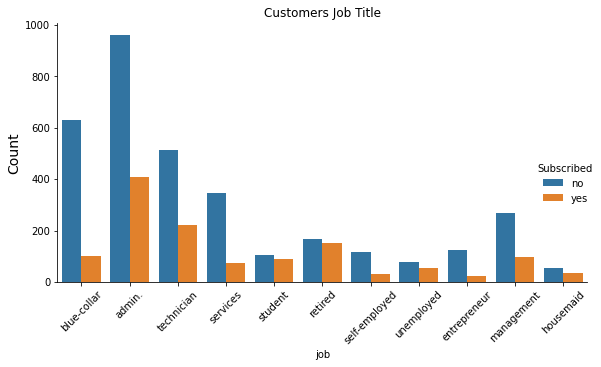

In [39]:
sns.catplot(x="job",kind="count",hue="Subscribed",height=5,aspect=1.5,data=data)
plt.ylabel("Count",size=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Customers Job Title");

# Modelling

In [40]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Subscribed', 'agecat', 'duration2',
       'duration_lastcontact', 'campaign_times', 'pdays_contact', 'prcontact'],
      dtype='object')

In [41]:
# Selecct variables for the machine learning

data2 = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Subscribed']]

In [42]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Subscribed
0,49,blue-collar,married,professional.course,no,yes,yes,cellular,may,tue,121,1,999,1,failure,no
1,49,blue-collar,married,professional.course,no,yes,yes,cellular,may,tue,145,1,999,1,failure,no
2,31,blue-collar,married,basic.9y,no,no,yes,cellular,may,tue,183,1,999,1,failure,no
3,39,blue-collar,married,basic.6y,no,yes,yes,cellular,may,thu,195,1,999,1,failure,no
4,39,blue-collar,married,high.school,no,no,yes,cellular,may,fri,248,1,999,1,failure,no


In [43]:
data2['Subscribed'].value_counts()

no     3365
yes    1287
Name: Subscribed, dtype: int64

In [44]:
# Convert the features to numeric

bank_df = pd.get_dummies(data2,drop_first=True)

In [45]:
bank_df.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,Subscribed_yes
0,49,121,1,999,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,49,145,1,999,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,31,183,1,999,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,39,195,1,999,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,39,248,1,999,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
X = bank_df.drop('Subscribed_yes',axis=1)
y = bank_df['Subscribed_yes']

In [47]:
# check for the class balance

y.value_counts()

0    3365
1    1287
Name: Subscribed_yes, dtype: int64

In [48]:
# Undersample the majority class using the imblearn package

! pip install imbalanced-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import imblearn

In [50]:
from imblearn.under_sampling import RandomUnderSampler

In [51]:
Undersample = RandomUnderSampler(sampling_strategy=0.85)
x_under,y_under = Undersample.fit_resample(X,y)

In [52]:
y_under.value_counts()

0    1514
1    1287
Name: Subscribed_yes, dtype: int64

In [53]:
x_under.shape

(2801, 41)

### Split the dataset for analysis


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x_under,y_under,test_size=0.20,random_state=42)

### Import the necesssary packages for analysis and pipeline

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_classif,VarianceThreshold

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('var',VarianceThreshold()),
                 ('selector',SelectKBest()),
                 ('classifier',LogisticRegression())])

In [59]:
search_space = [{'classifier':[LogisticRegression()],
                 'classifier__penalty':['l1','l2'],
                 'classifier__C':np.logspace(0,4,10)},
                {'classifier':[KNeighborsClassifier()],
                 'classifier__n_neighbors':[3,5,8,11],
                 'classifier__weights':['uniform','distance']},
                {'classifier':[RandomForestClassifier()],
                 'classifier__n_estimators':[10,100,1000],
                 'classifier__max_features':[1,2,3]}]

In [60]:
model = GridSearchCV(pipe,search_space,cv=10,verbose=0)
model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('var', VarianceThreshold()),
                                       ('selector', SelectKBest()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 8, 11],
                          'classifier__weights': ['uniform', 'distance']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],

In [61]:
best_est = model.best_estimator_
print(best_est)

Pipeline(steps=[('scaler', StandardScaler()), ('var', VarianceThreshold()),
                ('selector', SelectKBest()),
                ('classifier', LogisticRegression())])


In [62]:
model.best_score_

0.8053571428571427

In [63]:
best_est.score(X_test,y_test)

0.7807486631016043

The model perform better by 2% on the test set

### Model Evaluation

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

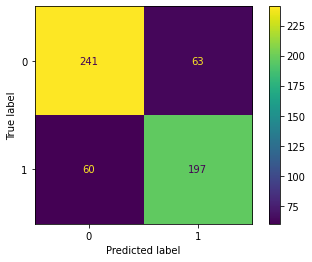

In [65]:
plot_confusion_matrix(model,X_test,y_test);

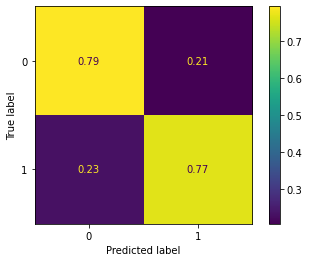

In [66]:
plot_confusion_matrix(model,X_test,y_test,normalize='true');

### Get the classification Report

In [67]:
y_pred = model.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       304
           1       0.76      0.77      0.76       257

    accuracy                           0.78       561
   macro avg       0.78      0.78      0.78       561
weighted avg       0.78      0.78      0.78       561



### Get the Feature Importance

In [69]:
coef = model.best_estimator_.named_steps['classifier'].coef_
importance = np.abs(coef)

In [70]:
col_after_var = X_train.columns[best_est['var'].get_support()]
mask_sel = best_est['selector'].get_support(indices=True)
final_feature_cols = col_after_var[mask_sel]

In [71]:
importance.shape

(1, 10)

In [72]:
importance

array([[1.11006896, 0.7204397 , 0.16508675, 0.13955223, 0.21582567,
        0.52649338, 0.32011786, 0.1641373 , 0.09213523, 0.35857964]])

In [73]:
imp = importance[0]

In [74]:
imp.shape

(10,)

In [75]:
imp

array([1.11006896, 0.7204397 , 0.16508675, 0.13955223, 0.21582567,
       0.52649338, 0.32011786, 0.1641373 , 0.09213523, 0.35857964])

In [76]:
SelectedFeatures = pd.Series(imp,final_feature_cols)

### Plot the selected features

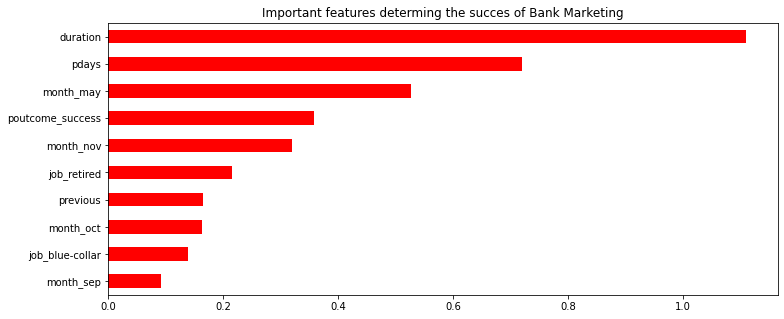

In [77]:
SelectedFeatures.sort_values().plot.barh(color='red',figsize=(12,5))
plt.title("Important features determing the succes of Bank Marketing");

# Results and Conclusions

Previous studies have documented some demographic variables i.e income, education and gender as important variables influencing the success of bank marketing campaigns, but our study did not find support for these variables looking at the top 10 features predicting subsription to bank's term deposit.  However, one factor that is closely reltaed to demographic from our results is job type of the customers.  Some studies have pointed out that elderly people are more likely to purchase, while age was not picked by our algorithm, customers that are retired were found to be more likely to purchase.  If we agree that retirement correlates with age, then our study confirms results of existing studies.

The most important factors influencing purchase from our study include:

* Duration of last contact in minutes with customers
* Number of days that passed by after the client was last contacted from a previous campaign
* The month of the year was also important--May, Nov, Oct and Sept in that order.
* The success of the previous campaign is also an important factor
* Blue collar job was also found to be an important factor.